<a href="https://colab.research.google.com/github/DenisSurovin/Boston-housing-regression/blob/main/Boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/DenisSurovin/Boston-housing-regression/refs/heads/main/BostonHousing.csv")

In [2]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

Проверяем на наличие пустых ячеек

In [4]:
data.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


Имеются 5 пустых ячеек в признаке rm. Поскольку их немного по сравнению с количеством данных, удалим эти ячейки.

In [5]:
dropped_data = data.dropna()

Построим гистограмму целевой переменной

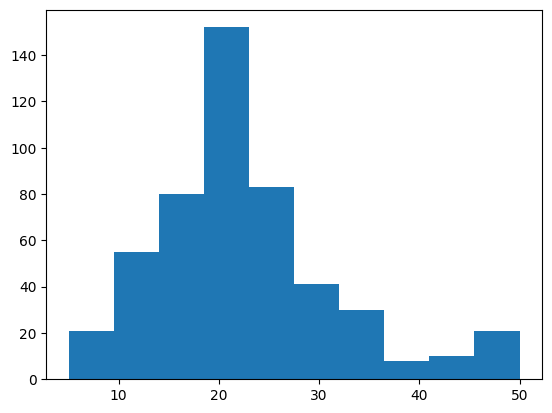

In [6]:
plt.hist(dropped_data.medv, bins=10)
plt.show()

Разделим на обучающую и тестовую выборки

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dropped_data.drop(columns=['medv']), dropped_data.medv, random_state=42)
print(y_train.shape, y_test.shape)

(375,) (126,)


Обучим модель линейной регрессии. В качестве метрик оценки качества модели будем использовать RMSE и R^2.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(X_train, y_train)

print('MSE on train samples:', round(root_mean_squared_error(LR.predict(X_train), y_train), 2))
print('MSE on test samples', round(root_mean_squared_error(LR.predict(X_test), y_test), 2))
print('R^2 on train samples:', round(r2_score(LR.predict(X_train), y_train), 3))
print('R^2 on test samples', round(r2_score(LR.predict(X_test), y_test), 3))

MSE on train samples: 4.84
MSE on test samples 4.39
R^2 on train samples: 0.637
R^2 on test samples 0.739


Результат получился не очень хорошим.

Посмотрим на признаки, которые сильнее всего влияют на цену недвижимости.

In [9]:
LR.coef_

array([-9.66487853e-02,  4.74083127e-02,  6.17510315e-02,  2.54465451e+00,
       -1.52787866e+01,  3.76114425e+00,  1.33959765e-02, -1.35454039e+00,
        2.91468555e-01, -1.22969599e-02, -8.90280044e-01,  1.22697784e-02,
       -6.23717309e-01])

Наибольшее влияние (коэффициент имеет порядок 10^1) оказывает признак nox (концентрация оксидов азота), причем, чем он больше, тем цена меньше. Также большое влияние (коэффициенты имеют порядки 10^0) оказывают chas (близко или далеко от реки Charles), rm (среднее число комнат в жилище), dis (взвешанные расстояния до 5 рабочих центров в Бостоне).

Было замечено, что при добавлении взаимодействия признаков rm * ptratio, а также rm * lstat, результат работы модели улучшается, хотя теперь интерпретировать коэффициенты сложнее.

In [88]:
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

X_train_poly['rm*ptratio'] = X_train_poly['rm'] * X_train_poly['ptratio']
X_train_poly['rm*lstat'] = X_train_poly['rm'] * X_train_poly['lstat']

X_test_poly['rm*ptratio'] = X_test_poly['rm'] * X_test_poly['ptratio']
X_test_poly['rm*lstat'] = X_test_poly['rm'] * X_test_poly['lstat']

LR_poly = LinearRegression()
LR_poly.fit(X_train_poly, y_train)

print('MSE on train polynomial samples:', round(root_mean_squared_error(LR_poly.predict(X_train_poly), y_train), 2))
print('MSE on test polynomial samples', round(root_mean_squared_error(LR_poly.predict(X_test_poly), y_test), 2))
print('R^2 on train polynomial samples:', round(r2_score(LR_poly.predict(X_train_poly), y_train), 3))
print('R^2 on test polynomial samples', round(r2_score(LR_poly.predict(X_test_poly), y_test), 3))

MSE on train polynomial samples: 4.14
MSE on test polynomial samples 3.28
R^2 on train polynomial samples: 0.757
R^2 on test polynomial samples 0.853


In [89]:
LR_poly.coef_

array([-1.68487714e-01,  1.40150162e-02,  1.04399793e-01,  2.49325044e+00,
       -1.10694319e+01,  1.97335874e+01,  1.50613862e-02, -8.60029700e-01,
        2.87152255e-01, -1.19666474e-02,  3.82020275e+00,  4.40231005e-03,
        1.33524430e+00, -7.03792786e-01, -3.42079870e-01])

Обучим модель решающего дерева.

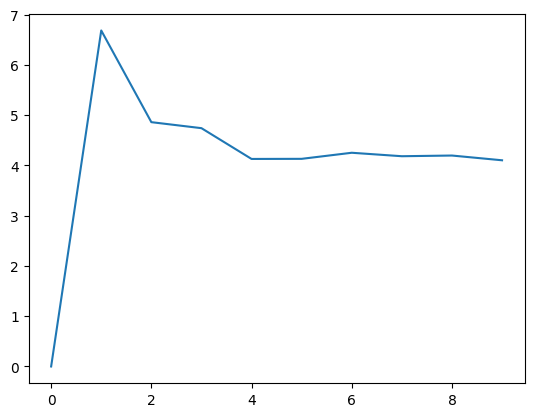

In [109]:
from sklearn.tree import DecisionTreeRegressor

max_depth_dtr = np.arange(10)
RMSE = np.zeros(10)

for i in range(1, 10):
  dtr = DecisionTreeRegressor(max_depth=i, random_state=42)
  dtr.fit(X_train, y_train)
  RMSE[i] = root_mean_squared_error(dtr.predict(X_test), y_test)

plt.plot(max_depth_dtr, RMSE)
plt.show()

Минимум RMSE достигает при max_depth = 4.

In [111]:
dtr = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr.fit(X_train, y_train)
round(root_mean_squared_error(dtr.predict(X_test), y_test), 3)

4.13

Результат получился хуже, чем в линейной модели.

Рассмотрим работу модели регрессии на основе метода k ближайших соседей.

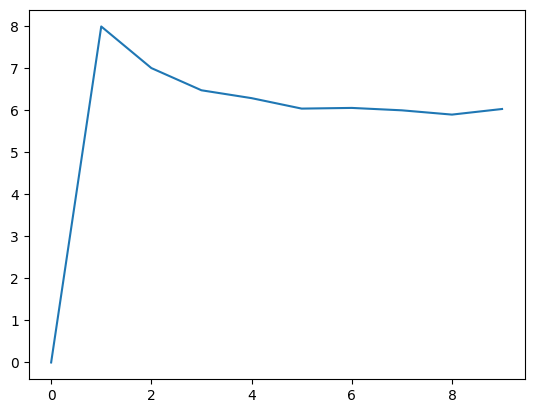

In [115]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors_knr = np.arange(10)
RMSE = np.zeros(10)

for i in range(1, 10):
  knr = KNeighborsRegressor(n_neighbors=i)
  knr.fit(X_train, y_train)
  RMSE[i] = root_mean_squared_error(knr.predict(X_test), y_test)

plt.plot(n_neighbors_knr, RMSE)
plt.show()

In [116]:
knr = KNeighborsRegressor(n_neighbors=8)
knr.fit(X_train, y_train)
round(root_mean_squared_error(knr.predict(X_test), y_test), 3)

5.89

Метод k ближайших соседей имеет самый худший результат из рассмотренных моделей.

Итак, самые лучшие результаты имеет модель линейной регрессии при введении взаимодействия признаков rm * ptratio и rm * lstat. Для него получился R^2 = 0.853, что является хорошим результатом, и RMSE = 3.28, учитывая, что средние значения целевой переменной находятся около 20, среднеквадратичный разброс 3.28 также является хорошим результатом.